###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, accuracy_score

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)

###Carregar a base de dados

Abaixo iremos carregar a base de dados "Non verbal tourists data DataSet".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv

Obs: iremos considerar a variável de saída: **Tipo/classe do cliente**

In [ ]:
df_clientes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv')
df_clientes

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,4,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,likes,?,2,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,5,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,3,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,3,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
5,F,31,canada,yes,likes,likes,likes,likes,likes,likes,likes,dislikes,1,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
6,M,64,canada,yes,indiferent,likes,likes,likes,likes,indiferent,indiferent,dislikes,1,10,2,B,dislikes,dislikes,likes,indiferent,dislikes,dislikes,1
7,M,51,argentina,yes,likes,likes,likes,likes,likes,indiferent,likes,dislikes,1,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
8,F,28,hungary,no,likes,likes,likes,likes,likes,indiferent,indiferent,dislikes,4,3,3,C,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
9,M,78,england,yes,likes,likes,likes,likes,likes,likes,likes,indiferent,1,3,2,A,dislikes,indiferent,likes,dislikes,likes,indiferent,2


In [ ]:
import missingno as msno

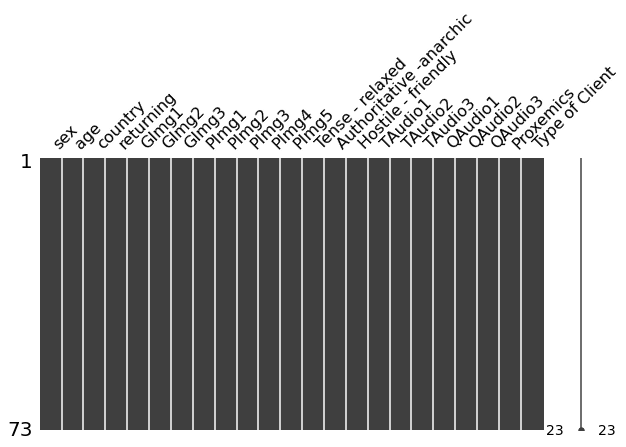

In [ ]:
msno.matrix(df_clientes, figsize=(10,5))

In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [ ]:
df_clientes.describe()

,age,Tense - relaxed,Hostile - friendly,Type of Client
count,73.000000,73.000000,73.000000,73.000000
mean,47.260274,2.232877,2.232877,2.493151
std,15.115323,1.523160,1.467429,1.226142
min,24.000000,1.000000,1.000000,0.000000
25%,36.000000,1.000000,1.000000,2.000000
50%,47.000000,2.000000,2.000000,2.000000
75%,56.000000,3.000000,3.000000,3.000000
max,81.000000,5.000000,6.000000,5.000000


In [ ]:
# verificando quais colunas apresentam '?' já que 
for column in df_clientes.select_dtypes(['object']).columns:
  print(column)
  print(df_clientes[column].value_counts())
  print('\n')

sex
F    38
M    35
Name: sex, dtype: int64


country
england      25
canada       18
germany       4
argentina     3
polish        3
scotland      3
italy         3
russia        3
spain         3
hungary       2
uruguay       1
brasil        1
colombia      1
chile         1
cuba          1
mexico        1
Name: country, dtype: int64


returning
yes    38
no     35
Name: returning, dtype: int64


GImg1
likes         50
indiferent    17
dislikes       6
Name: GImg1, dtype: int64


GImg2
likes         39
indiferent    22
dislikes      12
Name: GImg2, dtype: int64


GImg3
likes         41
indiferent    19
dislikes      12
?              1
Name: GImg3, dtype: int64


PImg1
likes         70
indiferent     3
Name: PImg1, dtype: int64


PImg2
likes    73
Name: PImg2, dtype: int64


PImg3
likes         45
dislikes      18
indiferent    10
Name: PImg3, dtype: int64


PImg4
likes         41
indiferent    17
dislikes      15
Name: PImg4, dtype: int64


PImg5
dislikes      70
?              2
in

In [ ]:
colunas_interrogacao = ['GImg3', 'PImg5', 'Authoritative -anarchic ']

In [ ]:
for column in colunas_interrogacao:
  print(column)
  print(df_clientes[column].value_counts())
  print('\n')

GImg3
likes         41
indiferent    19
dislikes      12
?              1
Name: GImg3, dtype: int64


PImg5
dislikes      70
?              2
indiferent     1
Name: PImg5, dtype: int64


Authoritative -anarchic 
2     13
9      9
4      9
3      8
1      8
10     7
8      5
7      5
6      5
5      3
?      1
Name: Authoritative -anarchic , dtype: int64




Observando os value counts das colunas categóricas, as colunas que apresentam '?' são GImg3, Authoritative -anarchic  e PImg5, onde PImg5 apresenta duas ocorrências de '?' enquanto GImg3 e Authoritative -anarchic  possuem 1 cada .

###Tratamento dos dados

Abaixo trate os valores "?" presente em algumas colunas. Use a estratégia que for mais confortável. 

Dica: Use a função `replace`.

In [ ]:
df_clientes_2 = df_clientes.replace('?', 'Unknown')

In [ ]:
df_clientes_2.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,4,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,likes,Unknown,2,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,5,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,3,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,3,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0


In [ ]:
df_clientes_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [ ]:
for column in colunas_interrogacao:
  print(column)
  print(df_clientes_2[column].value_counts())
  print('\n')

GImg3
likes         41
indiferent    19
dislikes      12
Unknown        1
Name: GImg3, dtype: int64


PImg5
dislikes      70
Unknown        2
indiferent     1
Name: PImg5, dtype: int64


Authoritative -anarchic 
2          13
9           9
4           9
3           8
1           8
10          7
8           5
7           5
6           5
5           3
Unknown     1
Name: Authoritative -anarchic , dtype: int64




A seguir substitua os valores categóricos (
Male, Female, Indifferent, likes, dislikes) por valores numéricos definidos por você.
 
Dica: leia a [página](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) da documentação da biblioteca Pandas.


In [ ]:
df_clientes_2.select_dtypes(['object']).columns

Index(['sex', 'country', 'returning', 'GImg1', 'GImg2', 'GImg3', 'PImg1',
       'PImg2', 'PImg3', 'PImg4', 'PImg5', 'Authoritative -anarchic ',
       'TAudio1', 'TAudio2', 'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3',
       'Proxemics'],
      dtype='object')

In [ ]:
df_clientes_cat = df_clientes_2.copy()

In [ ]:
for col in list(df_clientes_cat.select_dtypes(['object']).columns):
  df_clientes_cat[col] = df_clientes_cat[col].astype('category').cat.codes

In [ ]:
df_clientes_cat.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,0,42,15,0,2,1,2,1,0,1,1,1,4,8,3,2,0,0,1,0,0,0,0
1,1,60,1,0,2,1,2,1,0,2,2,0,2,9,1,1,0,0,2,2,0,0,0
2,0,25,6,0,1,1,2,1,0,1,2,1,5,1,5,2,0,0,2,0,0,0,0
3,1,43,2,0,2,0,1,1,0,1,1,1,3,2,1,2,0,0,2,0,1,0,0
4,1,30,8,0,1,1,2,1,0,1,2,1,3,9,3,2,0,0,2,1,0,0,0


In [ ]:
df_clientes_cat['Authoritative -anarchic '].value_counts()

2     13
9      9
4      9
3      8
0      8
1      7
8      5
7      5
6      5
5      3
10     1
Name: Authoritative -anarchic , dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


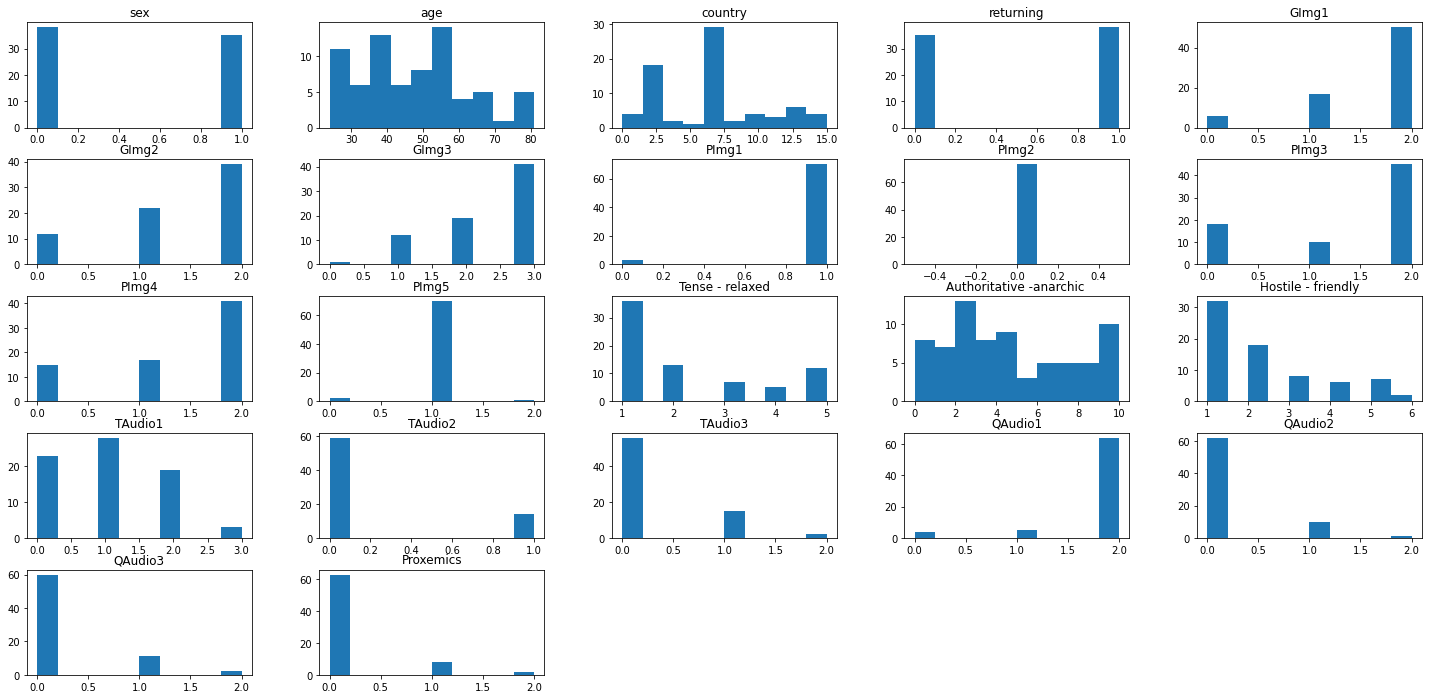

In [ ]:
fig = plt.figure(figsize = (25,12))
ax = fig.gca()
df_clientes_cat.drop('Type of Client', axis = 1).hist(ax= ax, grid = False)
plt.show()

In [ ]:
corr_c = df_clientes_cat.drop('PImg2', axis = 1).corr()
corr_c.style.background_gradient(cmap='coolwarm').format(precision=2)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
sex,1.00,0.15,-0.18,0.04,-0.13,-0.14,-0.13,0.06,-0.06,-0.02,0.07,-0.04,0.00,-0.06,-0.03,-0.12,0.05,0.01,0.02,0.11,-0.05,-0.03
age,0.15,1.00,-0.29,0.32,0.30,0.23,0.27,-0.05,0.33,0.27,0.07,-0.40,-0.09,-0.27,-0.25,-0.16,0.03,0.07,-0.09,0.06,0.18,-0.20
country,-0.18,-0.29,1.00,-0.12,-0.19,-0.30,-0.25,0.01,-0.29,-0.33,0.16,0.37,-0.08,0.18,0.37,-0.12,-0.01,-0.28,-0.22,-0.03,-0.23,0.29
returning,0.04,0.32,-0.12,1.00,0.52,0.58,0.54,0.22,0.58,0.50,0.07,-0.50,-0.22,-0.30,-0.58,-0.02,0.34,0.37,0.05,0.19,0.11,-0.33
GImg1,-0.13,0.30,-0.19,0.52,1.00,0.60,0.64,0.30,0.80,0.66,-0.04,-0.57,-0.07,-0.40,-0.38,0.14,0.11,0.50,0.04,0.18,-0.16,-0.65
GImg2,-0.14,0.23,-0.30,0.58,0.60,1.00,0.84,0.29,0.69,0.63,0.03,-0.63,-0.03,-0.37,-0.74,0.13,0.18,0.46,0.07,0.10,0.27,-0.50
GImg3,-0.13,0.27,-0.25,0.54,0.64,0.84,1.00,0.27,0.68,0.63,0.12,-0.71,0.05,-0.35,-0.65,0.12,0.24,0.50,0.11,0.13,0.18,-0.55
PImg1,0.06,-0.05,0.01,0.22,0.30,0.29,0.27,1.00,0.25,0.26,-0.01,-0.20,0.03,-0.11,-0.15,0.10,0.11,0.34,-0.09,0.09,-0.08,-0.31
PImg3,-0.06,0.33,-0.29,0.58,0.80,0.69,0.68,0.25,1.00,0.73,-0.05,-0.62,-0.07,-0.36,-0.56,0.12,0.23,0.47,0.06,0.19,0.02,-0.58
PImg4,-0.02,0.27,-0.33,0.50,0.66,0.63,0.63,0.26,0.73,1.00,-0.05,-0.56,-0.13,-0.36,-0.55,0.04,0.01,0.39,0.16,0.13,-0.01,-0.63


Observando o gráfico dos hitogramas, temos PImg2 apresentando um valor apenas para todo o dataset, logo optou-se pela remoção desta coluna, PImg1 e PImg5 também apresentam um valor que se sobressai sobre os demais, contudo estas ainda apresentam correlação com a variável target (Type of Client), por isso optou-se por mantê-las

In [ ]:
df_clientes_cat = df_clientes_cat.drop(['PImg2'], axis =1)

In [ ]:
# Foi observado nos value_counts que a coluna PImg2 indica 'likes' para todo o 
# dataset, logo para realizar o one hot encoding usando get_dummies, 
# esta coluna também foi excluída pois não auxilia na classificação
df_clientes_dummies = pd.get_dummies(df_clientes_2.drop(['PImg2',], axis =1))

In [ ]:
df_clientes_dummies.head()

,age,Tense - relaxed,Hostile - friendly,Type of Client,sex_F,sex_M,country_argentina,country_brasil,country_canada,country_chile,country_colombia,country_cuba,country_england,country_germany,country_hungary,...,TAudio3_dislikes,TAudio3_indiferent,TAudio3_likes,QAudio1_dislikes,QAudio1_indiferent,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio2_likes,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,Proxemics_dislikes,Proxemics_indiferent,Proxemics_likes
0,42,4,3,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,60,2,1,0,0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
2,25,5,5,0,1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
3,43,3,1,0,0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
4,30,3,3,0,0,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0


Visualize os dados usando das funções que achar necessarias e caso necessario remova as colunas que não agreguem informação. Justifique a remoção de colunas caso ocoram.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


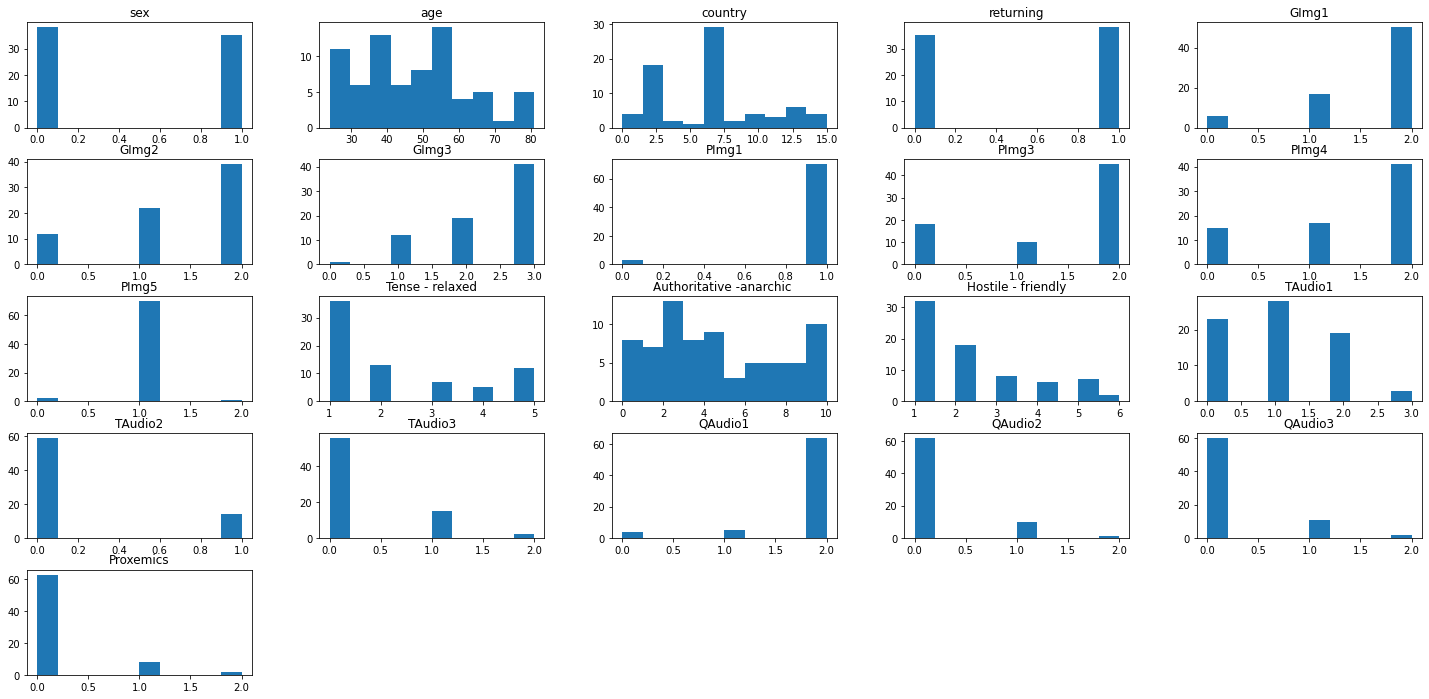

In [ ]:
fig = plt.figure(figsize = (25,12))
ax = fig.gca()
df_clientes_cat.drop('Type of Client', axis = 1).hist(ax= ax, grid = False)
plt.show()

In [ ]:
corr_c = df_clientes_cat.corr()
corr_c.style.background_gradient(cmap='coolwarm').format(precision=2)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
sex,1.00,0.15,-0.18,0.04,-0.13,-0.14,-0.13,0.06,-0.06,-0.02,0.07,-0.04,0.00,-0.06,-0.03,-0.12,0.05,0.01,0.02,0.11,-0.05,-0.03
age,0.15,1.00,-0.29,0.32,0.30,0.23,0.27,-0.05,0.33,0.27,0.07,-0.40,-0.09,-0.27,-0.25,-0.16,0.03,0.07,-0.09,0.06,0.18,-0.20
country,-0.18,-0.29,1.00,-0.12,-0.19,-0.30,-0.25,0.01,-0.29,-0.33,0.16,0.37,-0.08,0.18,0.37,-0.12,-0.01,-0.28,-0.22,-0.03,-0.23,0.29
returning,0.04,0.32,-0.12,1.00,0.52,0.58,0.54,0.22,0.58,0.50,0.07,-0.50,-0.22,-0.30,-0.58,-0.02,0.34,0.37,0.05,0.19,0.11,-0.33
GImg1,-0.13,0.30,-0.19,0.52,1.00,0.60,0.64,0.30,0.80,0.66,-0.04,-0.57,-0.07,-0.40,-0.38,0.14,0.11,0.50,0.04,0.18,-0.16,-0.65
GImg2,-0.14,0.23,-0.30,0.58,0.60,1.00,0.84,0.29,0.69,0.63,0.03,-0.63,-0.03,-0.37,-0.74,0.13,0.18,0.46,0.07,0.10,0.27,-0.50
GImg3,-0.13,0.27,-0.25,0.54,0.64,0.84,1.00,0.27,0.68,0.63,0.12,-0.71,0.05,-0.35,-0.65,0.12,0.24,0.50,0.11,0.13,0.18,-0.55
PImg1,0.06,-0.05,0.01,0.22,0.30,0.29,0.27,1.00,0.25,0.26,-0.01,-0.20,0.03,-0.11,-0.15,0.10,0.11,0.34,-0.09,0.09,-0.08,-0.31
PImg3,-0.06,0.33,-0.29,0.58,0.80,0.69,0.68,0.25,1.00,0.73,-0.05,-0.62,-0.07,-0.36,-0.56,0.12,0.23,0.47,0.06,0.19,0.02,-0.58
PImg4,-0.02,0.27,-0.33,0.50,0.66,0.63,0.63,0.26,0.73,1.00,-0.05,-0.56,-0.13,-0.36,-0.55,0.04,0.01,0.39,0.16,0.13,-0.01,-0.63


In [ ]:
corr_c['Type of Client'].sort_values(ascending=True)

GImg1                      -0.649655
PImg4                      -0.630145
PImg3                      -0.584992
GImg3                      -0.551112
GImg2                      -0.499999
QAudio1                    -0.435572
returning                  -0.331908
QAudio2                    -0.330296
PImg1                      -0.312843
age                        -0.195869
QAudio3                    -0.105934
TAudio2                    -0.082981
TAudio3                    -0.076227
Authoritative -anarchic    -0.059642
sex                        -0.028379
Proxemics                   0.104761
PImg5                       0.138667
TAudio1                     0.274991
Hostile - friendly          0.290367
country                     0.292408
Tense - relaxed             0.406167
Type of Client              1.000000
Name: Type of Client, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


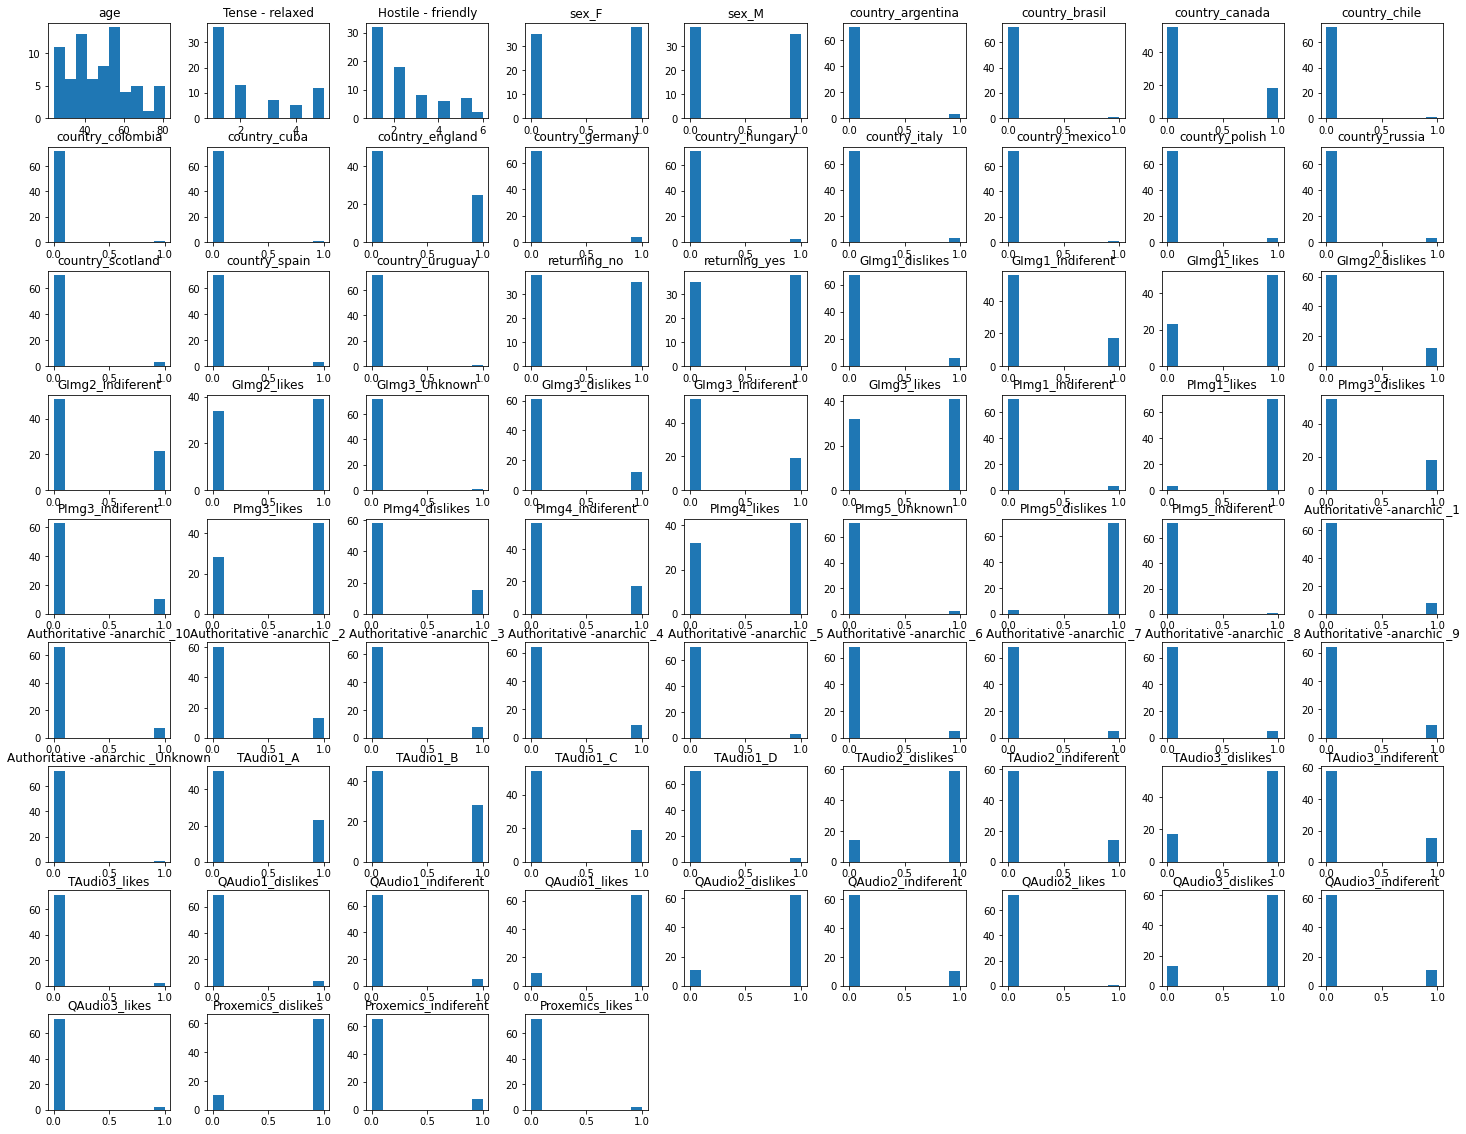

In [ ]:
fig = plt.figure(figsize = (25,20))
ax = fig.gca()
df_clientes_dummies.drop('Type of Client', axis = 1).hist(ax= ax, grid = False)
plt.show()

In [ ]:
corr = df_clientes_dummies.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,age,Tense - relaxed,Hostile - friendly,Type of Client,sex_F,sex_M,country_argentina,country_brasil,country_canada,country_chile,country_colombia,country_cuba,country_england,country_germany,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay,returning_no,returning_yes,GImg1_dislikes,GImg1_indiferent,GImg1_likes,GImg2_dislikes,GImg2_indiferent,GImg2_likes,GImg3_Unknown,GImg3_dislikes,GImg3_indiferent,GImg3_likes,PImg1_indiferent,PImg1_likes,PImg3_dislikes,PImg3_indiferent,PImg3_likes,PImg4_dislikes,PImg4_indiferent,PImg4_likes,PImg5_Unknown,PImg5_dislikes,PImg5_indiferent,Authoritative -anarchic _1,Authoritative -anarchic _10,Authoritative -anarchic _2,Authoritative -anarchic _3,Authoritative -anarchic _4,Authoritative -anarchic _5,Authoritative -anarchic _6,Authoritative -anarchic _7,Authoritative -anarchic _8,Authoritative -anarchic _9,Authoritative -anarchic _Unknown,TAudio1_A,TAudio1_B,TAudio1_C,TAudio1_D,TAudio2_dislikes,TAudio2_indiferent,TAudio3_dislikes,TAudio3_indiferent,TAudio3_likes,QAudio1_dislikes,QAudio1_indiferent,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio2_likes,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,Proxemics_dislikes,Proxemics_indiferent,Proxemics_likes
age,1.00,-0.40,-0.27,-0.20,-0.15,0.15,0.10,0.10,0.12,0.26,0.05,-0.05,0.03,-0.04,-0.20,-0.05,-0.06,0.04,-0.09,0.04,-0.30,-0.04,-0.32,0.32,-0.22,-0.17,0.28,-0.13,-0.17,0.25,-0.06,-0.13,-0.23,0.32,0.05,-0.05,-0.32,-0.01,0.30,-0.23,-0.07,0.25,0.08,-0.21,0.24,0.07,0.07,0.08,-0.11,-0.11,-0.16,0.20,0.06,0.15,-0.20,-0.06,0.09,0.30,-0.47,0.08,0.16,-0.16,-0.13,0.23,-0.23,0.01,-0.17,0.12,0.14,-0.18,0.10,-0.03,-0.02,0.11,-0.23,0.26,-0.01
Tense - relaxed,-0.40,1.00,0.50,0.41,0.04,-0.04,-0.17,-0.02,-0.30,-0.10,0.06,-0.02,-0.03,0.36,0.14,0.06,-0.02,-0.17,0.38,0.01,0.06,0.14,0.50,-0.50,0.35,0.41,-0.58,0.59,0.08,-0.51,0.22,0.52,0.26,-0.67,0.20,-0.20,0.56,0.12,-0.59,0.37,0.34,-0.59,-0.03,0.08,-0.10,-0.26,0.01,0.17,0.06,0.05,0.01,-0.19,-0.04,-0.01,0.14,-0.10,-0.44,-0.25,0.57,0.38,0.14,-0.14,0.17,-0.30,0.31,0.28,0.17,-0.33,0.12,-0.11,-0.02,0.17,-0.12,-0.14,0.19,-0.23,0.03
Hostile - friendly,-0.27,0.50,1.00,0.29,0.06,-0.06,-0.03,-0.10,-0.20,-0.10,-0.02,-0.02,0.08,0.21,0.09,-0.08,0.06,0.01,0.25,-0.13,-0.03,0.06,0.30,-0.30,0.23,0.31,-0.42,0.31,0.10,-0.32,0.14,0.28,0.06,-0.29,0.11,-0.11,0.37,-0.04,-0.30,0.24,0.22,-0.39,-0.08,0.08,-0.02,-0.21,0.11,-0.00,0.03,0.11,-0.08,-0.19,0.25,-0.08,0.05,-0.10,-0.13,-0.22,0.25,0.30,0.05,-0.05,0.02,-0.06,0.09,0.04,0.07,-0.08,0.01,0.02,-0.10,-0.10,0.14,-0.08,0.06,-0.12,0.09
Type of Client,-0.20,0.41,0.29,1.00,0.03,-0.03,-0.14,-0.24,-0.18,-0.05,-0.05,0.05,0.02,0.30,-0.27,0.20,0.15,-0.08,0.31,-0.08,0.26,-0.24,0.33,-0.33,0.53,0.28,-0.57,0.49,0.03,-0.39,0.24,0.46,0.04,-0.44,0.31,-0.31,0.76,-0.46,-0.35,0.60,0.04,-0.53,-0.21,0.20,-0.05,0.04,-0.17,0.11,-0.03,0.16,0.03,-0.02,0.02,-0.11,-0.05,-0.05,-0.06,-0.27,0.25,0.26,0.08,-0.08,0.12,-0.15,0.07,0.35,0.25,-0.43,0.30,-0.23,-0.24,0.10,-0.08,-0.07,-0.07,0.00,0.14
sex_F,-0.15,0.04,0.06,0.03,1.00,-1.00,-0.08,-0.12,-0.02,0.11,0.11,-0.12,-0.00,-0.13,-0.01,-0.22,0.11,0.06,0.06,0.06,0.20,0.11,0.04,-0.04,-0.21,0.07,0.06,-0.17,0.03,0.09,-0.12,-0.09,0.01,0.09,0.06,-0.06,-0.02,-0.10,0.09,-0.12,0.20,-0.07,-0.01,0.08,-0.12,0.07,-0.06,-0.05,-0.01,0.03,0.06,-0.07,0.15,0.04,-0.14,0.11,0.12,-0.20,0.01,0.20,-0.12,0.12,0.06,-0.05,-0.01,-0.01,0.04,-0.03,-0.02,0.06,-0.12,0.13,-0.13,-0.01,-0.06,0.07,-0.01
sex_M,0.15,-0.04,-0.06,-0.03,-1.00,1.00,0.08,0.12,0.02,-0.11,-0.11,0.12,0.00,0.13,0.01,0.22,-0.11,-0.06,-0.06,-0.06,-0.20,-0.11,-0.04,0.04,0.21,-0.07,-0.06,0.17,-0.03,-0.09,0.12,0.09,-0.01,-0.09,-0.06,0.06,0.02,0.10,-0.09,0.12,-0.20,0.07,0.01,-0.08,0.12,-0.07,0.06,0.05,0.01,-0.03,-0.06,0.07,-0.15,-0.04,0.14,-0.11,-0.12,0.20,-0.01,-0.20,0.12,-0.12,-0.06,0.05,0.01,0.01,-0.04,0.03,0.02,-0.06,0.12,-0.13,0.13,0.01,0.06,-0.07,0.01
country_argentina,0.10,-0.17,-0.03,-0.14,-0.08,0.08,1.00,-0.02,-0.12,-0.02,-0.02,-0.02,-0.15,-0.05,-0.03,-0.04,-0.

In [ ]:
corr['Type of Client'].sort_values(ascending=True)

GImg1_likes                        -0.572895
PImg4_likes                        -0.526422
PImg3_indiferent                   -0.455808
GImg3_likes                        -0.435735
QAudio1_likes                      -0.429823
GImg2_likes                        -0.388634
PImg3_likes                        -0.351462
returning_yes                      -0.331908
PImg1_likes                        -0.312843
country_hungary                    -0.274714
TAudio1_B                          -0.273183
QAudio2_likes                      -0.241289
country_brasil                     -0.241289
country_uruguay                    -0.241289
QAudio2_indiferent                 -0.226784
PImg5_Unknown                      -0.205799
age                                -0.195869
country_canada                     -0.179481
Authoritative -anarchic _10        -0.170096
TAudio3_indiferent                 -0.150269
country_argentina                  -0.140508
Authoritative -anarchic _8         -0.109816
country_po

Faça as demais transformações que julgar necessárias na base de dados.

In [ ]:
# [ALTERE AQUI]

###Separação treino/teste

Separe os valores e os rótulos da base de dados.

In [ ]:
X = df_clientes_dummies.drop('Type of Client', axis = 1)
y = df_clientes_dummies['Type of Client']

In [ ]:
X_cat = df_clientes_cat.drop('Type of Client', axis = 1)
y_cat = df_clientes_cat['Type of Client']

Separe a base de dados em teste e treino. Use a divisão 75% para treino 25% para teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [ ]:
len(y_test)

19

In [ ]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.25, random_state = 42)

In [ ]:
len(y_test_cat)

19

Realizando a normalização dos dados

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler_cat = StandardScaler()

In [ ]:
scaler_cat.fit(X_train_cat)

StandardScaler()

In [ ]:
X_train_cat_scaled = scaler_cat.transform(X_train_cat)
X_test_cat_scaled = scaler_cat.transform(X_test_cat)

###KNN

Instancie e treine a KNN com diversos valores para os vizinhos. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [ ]:
def train_knn(X_train, X_test, y_train, k):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)
  return neigh.predict(X_test)

In [ ]:
acc_scores = []
recall_scores_macro = []
for i in range(0,25):
  print(f'Treinando para k = {i+1}')
  pred_i = train_knn(X_train_scaled, X_test_scaled, y_train, i+1)
  acc_scores.append(accuracy_score(y_test, pred_i))
  recall_scores_macro.append(recall_score(y_test, pred_i, average='macro'))

Treinando para k = 1
Treinando para k = 2
Treinando para k = 3
Treinando para k = 4
Treinando para k = 5
Treinando para k = 6
Treinando para k = 7
Treinando para k = 8
Treinando para k = 9
Treinando para k = 10
Treinando para k = 11
Treinando para k = 12
Treinando para k = 13
Treinando para k = 14
Treinando para k = 15
Treinando para k = 16
Treinando para k = 17
Treinando para k = 18
Treinando para k = 19
Treinando para k = 20
Treinando para k = 21
Treinando para k = 22
Treinando para k = 23
Treinando para k = 24
Treinando para k = 25


In [ ]:
acc_scores_c = []
recall_scores_macro_c = []
for i in range(0,25):
  print(f'Treinando para k = {i+1}')
  pred_i_c = train_knn(X_train_cat_scaled, X_test_cat_scaled, y_train_cat, i+1)
  acc_scores_c.append(accuracy_score(y_test_cat, pred_i_c))
  recall_scores_macro_c.append(recall_score(y_test_cat, pred_i_c, average='macro'))

Treinando para k = 1
Treinando para k = 2
Treinando para k = 3
Treinando para k = 4
Treinando para k = 5
Treinando para k = 6
Treinando para k = 7
Treinando para k = 8
Treinando para k = 9
Treinando para k = 10
Treinando para k = 11
Treinando para k = 12
Treinando para k = 13
Treinando para k = 14
Treinando para k = 15
Treinando para k = 16
Treinando para k = 17
Treinando para k = 18
Treinando para k = 19
Treinando para k = 20
Treinando para k = 21
Treinando para k = 22
Treinando para k = 23
Treinando para k = 24
Treinando para k = 25


As métricas analisadas para o problema foram a acurácia e o recall "macro" (definido como a média dos scores para todas as classes da classificação), essas foram utilizadas para se certificar que o modelo classifique corretamente as 5 classes e nessa classificação, com a baixa ocorrência de falsos negativos na classificação dos turistas. 

Plote as métricas em um gráfico.

In [ ]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing = 0.05,
                    subplot_titles=('Acurácia vs K Value', 
                                    'Recall macro vs K Value'))
fig.add_trace(go.Scatter(x= list(range(1,26)), y=acc_scores, name = 'Acurácia'), row=1, col=1)
fig.add_trace(go.Scatter(x= list(range(1,26)), y=recall_scores_macro, name = 'Recall macro'), row=1, col=2)
fig.update_layout(
    width=1000,
    height=500,
    title = 'Gráficos - get_dummies'
    )
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing = 0.05,
                    subplot_titles=('Acurácia vs K Value', 
                                    'Recall macro vs K Value'))
fig.add_trace(go.Scatter(x= list(range(1,26)), y=acc_scores_c, name = 'Acurácia'), row=1, col=1)
fig.add_trace(go.Scatter(x= list(range(1,26)), y=recall_scores_macro_c, name = 'Recall macro'), row=1, col=2)
fig.update_layout(
    width=1000,
    height=500,
    title = 'Gráficos - LabelEncoding'
    )
fig.show()

Para os gráficos vemos que a maior acurácia e Recal ocorrrem quando k = 2 e utilizando o processamento de OneHotEncoding do pd.get_dummies().

Plote a matriz de confusão.

Para o get_dummies

In [ ]:
neigh2 = KNeighborsClassifier(n_neighbors=2)
neigh2.fit(X_train_scaled, y_train)
y_predict = neigh2.predict(X_test_scaled)

In [ ]:
# Observando o relatório de classificação para o k=2
print('Com K=2')
print(classification_report(y_test, y_predict, zero_division = 0))

Com K=2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       0.75      1.00      0.86         9
           3       1.00      0.50      0.67         2
           4       1.00      0.75      0.86         4
           5       0.00      0.00      0.00         1

    accuracy                           0.84        19
   macro avg       0.79      0.71      0.73        19
weighted avg       0.83      0.84      0.81        19



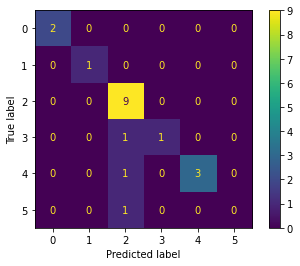

In [ ]:
cm = confusion_matrix(y_test, y_predict, labels=y_test.sort_values().unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=y_test.sort_values().unique())
disp.plot()

Para o labelEncoding

In [ ]:
neigh2le = KNeighborsClassifier(n_neighbors=2)
neigh2le.fit(X_train_cat_scaled, y_train_cat)
y_predict_c = neigh2le.predict(X_test_cat_scaled)

In [ ]:
# Observando o relatório de classificação para o k=2
print('Com K=2')
print(classification_report(y_test_cat, y_predict_c, zero_division = 0))

Com K=2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.75      1.00      0.86         9
           3       0.00      0.00      0.00         2
           4       0.80      1.00      0.89         4
           5       0.00      0.00      0.00         1

    accuracy                           0.74        19
   macro avg       0.42      0.50      0.46        19
weighted avg       0.58      0.74      0.65        19



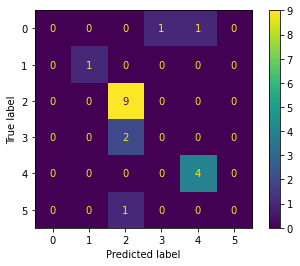

In [ ]:
cm = confusion_matrix(y_test_cat, y_predict_c, labels=y_test_cat.sort_values().unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=y_test_cat.sort_values().unique())
disp.plot()

Extra: Analisando com cross validation se a estratégia do uso do get_dummies é melhor que a de label encoding num cenário sem o random_state=42.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

In [ ]:
neigh2_cv = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=2))
neigh2_cv_c = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=2))

In [ ]:
cv_results_dummies = cross_validate(neigh2_cv, X, y, cv=4, scoring = 'accuracy')

In [ ]:
cv_results_cat = cross_validate(neigh2_cv_c, X_cat, y_cat, cv=4, scoring = 'accuracy')

In [ ]:
cv_results_dummies

{'fit_time': array([0.01054788, 0.00564528, 0.00524211, 0.00511885]),
 'score_time': array([0.00625277, 0.0033803 , 0.00339723, 0.00440741]),
 'test_score': array([0.47368421, 0.83333333, 0.72222222, 0.61111111])}

In [ ]:
cv_results_dummies['test_score']

array([0.47368421, 0.83333333, 0.72222222, 0.61111111])

In [ ]:
cv_results_dummies['test_score'].mean()

0.6600877192982456

In [ ]:
cv_results_cat

{'fit_time': array([0.00830817, 0.0075922 , 0.00499821, 0.0043838 ]),
 'score_time': array([0.00477505, 0.00491786, 0.00316358, 0.00297141]),
 'test_score': array([0.63157895, 0.72222222, 0.72222222, 0.5       ])}

In [ ]:
cv_results_cat['test_score']

array([0.63157895, 0.72222222, 0.72222222, 0.5       ])

In [ ]:
cv_results_cat['test_score'].mean()

0.6440058479532164

Ao analisar o resultado da validação cruzada, vê-se que o resultado do get_dummies, no segundo fold, é próximo ao encontrado no notebook com random_state = 42 no segundo fold, contudo no primeiro fold, a acurácia cai para menos do que o resultado obtido pelo label encoding. 

Ainda assim, a acurácia média obtida pelo get_dummies (0.660) é maior que a do label encoding na validação cruzada (0.644), logo, como visto anteriormente, esse método foi superior ao label encoding.